# Decision Trees and Random Forests in Python

## Introduction
Kyphosis is a medical condition characterized by an excessive outward curvature of the spine, leading to a rounded or hunched upper back. It’s commonly referred to as a "hunchback" appearance.

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [11]:
df = pd.read_csv("kyphosis.csv")

In [13]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

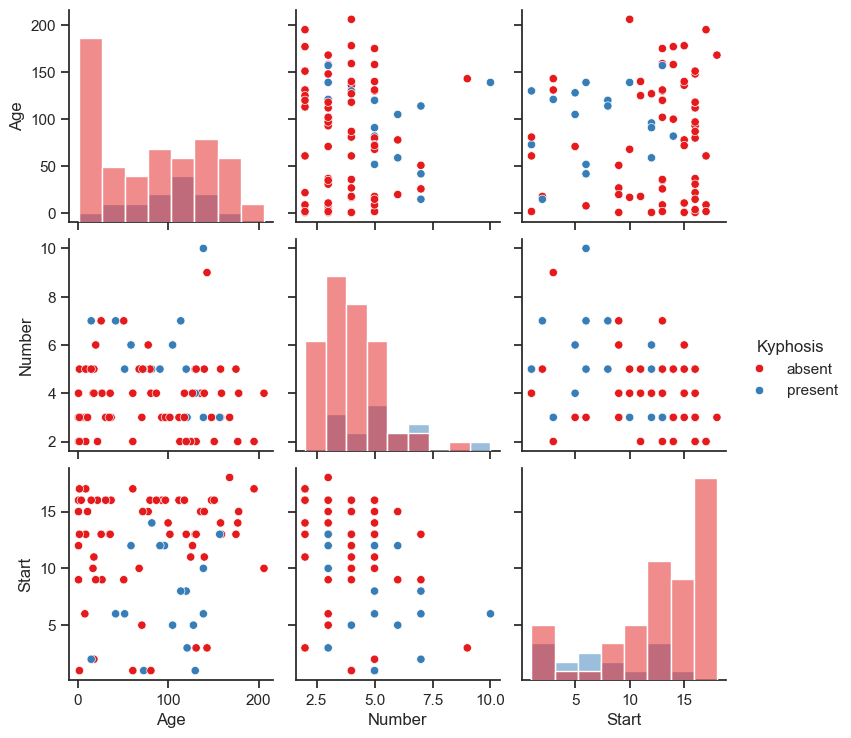

In [24]:
sns.pairplot(df,hue ='Kyphosis', palette = 'Set1', diag_kind ='hist')

## Train Test Split

Let's split up the data into a training set and a test set!

In [31]:
from sklearn.model_selection import train_test_split

In [68]:
#seperate features and target variable
X = df.drop('Kyphosis', axis =1)   #features
y = df['Kyphosis']   #target variable

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [127]:
X_train.shape

(56, 3)

In [129]:
X_test.shape

(25, 3)

## Decision Trees

We'll start just by training a single decision tree.

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dtree = DecisionTreeClassifier()

In [136]:
#tain the model on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
#make presdiction on the test set
prediction = dtree.predict(X_test)

In [141]:
#classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [142]:
#confusion matrix
print(confusion_matrix(y_test, prediction))

[[17  2]
 [ 5  1]]


In [154]:
print(accuracy_score(y_test, prediction))

0.72


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [166]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from io import StringIO
import pydot
from IPython.display import Image



In [168]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

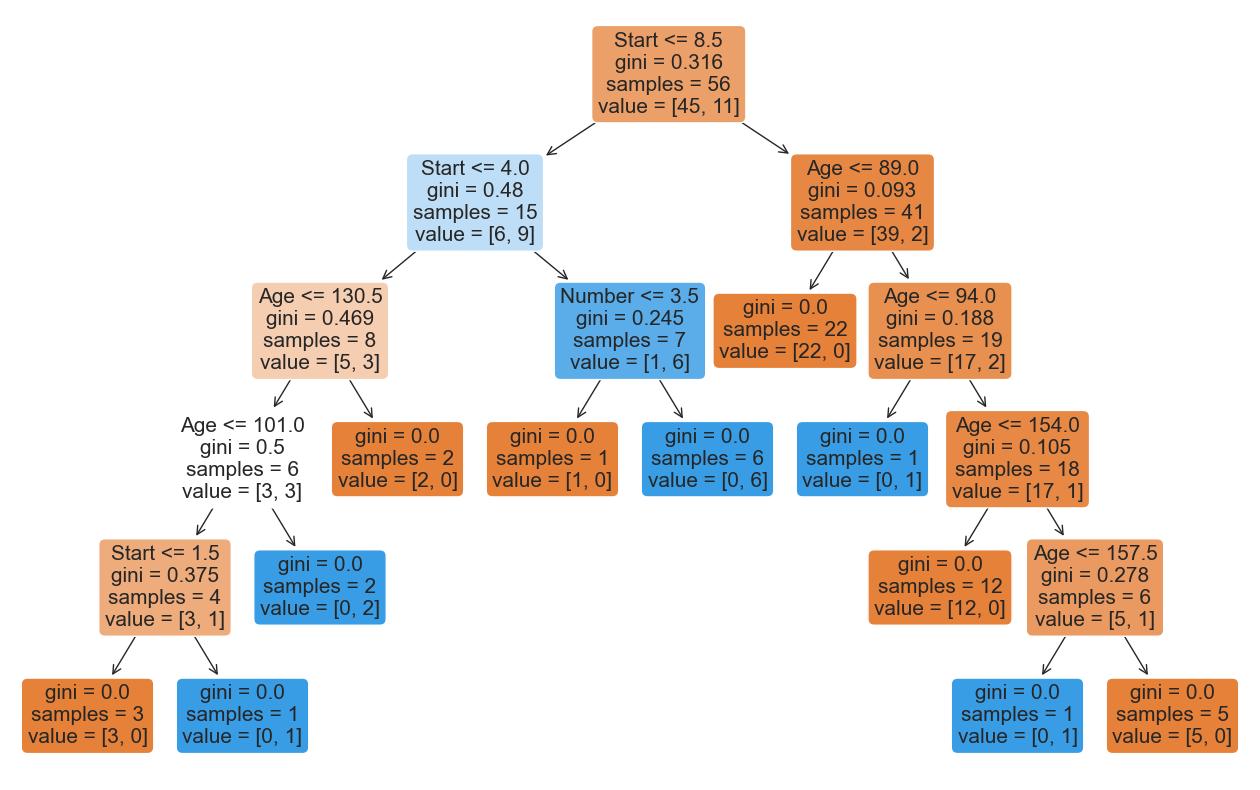

In [194]:
#Exporting tree visualization with pydot

plt.figure(figsize =(16,10))
plot_tree(dtree,feature_names =X.columns, filled = True, rounded =True, fontsize = 15);

## Random Forests

Now let's compare the decision tree model to a random forest.

In [198]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
rfc_pred = rfc.predict(X_test)

In [202]:
print(confusion_matrix(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


In [204]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



# END